In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("sales_data_sample.csv",encoding="unicode_escape")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
to_drop=df[['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','PHONE','TERRITORY']]
df=df.drop(to_drop,axis=1)

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium


In [10]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [31]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
import datetime  as dt
snap_date=df['ORDERDATE'].max()+dt.timedelta(days=1)
df_rfm=df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE':lambda x:(snap_date-x.max()).days,
    'ORDERNUMBER':'count',
    'SALES':'sum'
})

In [15]:
df_rfm=df_rfm.rename(columns={
    'ORDERDATE':'Recency',
    'ORDERNUMBER':'Frequency',
    'SALES':'Monetaryvalue'   
})


In [16]:
df_rfm.head()

,Recency,Frequency,Monetaryvalue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [18]:
df_rfm['M']=pd.qcut(df_rfm['Monetaryvalue'],q=4,labels=range(1,5))
df_rfm['F']=pd.qcut(df_rfm['Frequency'],q=4,labels=range(1,5))
df_rfm['R']=pd.qcut(df_rfm['Recency'],q=4,labels=range(4,0,-1))

In [20]:
df_rfm['sum']=df_rfm[['M','R','F']].sum(axis=1)

In [21]:
df_rfm.head()

,Recency,Frequency,Monetaryvalue,M,F,R,sum
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,4,4,2,10
Alpha Cognac,65,20,70488.44,2,2,4,8
Amica Models & Co.,265,26,94117.26,3,2,1,6
"Anna's Decorations, Ltd",84,46,153996.13,4,4,3,11
Atelier graphique,188,7,24179.96,1,1,2,4


In [22]:
data=df_rfm[['Recency','Frequency','Monetaryvalue']]
data.head()

,Recency,Frequency,Monetaryvalue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [23]:
data_log=np.log(data)

In [24]:
col_name=['Recency','Frequency','Monetaryvalue']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_log)
data_norm=scaler.transform(data_log)
data_new=pd.DataFrame(data_norm,columns=col_name)
data_new.head()



,Recency,Frequency,Monetaryvalue
0,0.410354,1.224468,0.969091
1,-0.409509,-0.391907,-0.384655
2,0.634398,0.061124,0.100944
3,-0.219030,1.046298,0.928021
4,0.379399,-2.204660,-2.181842


In [27]:
from sklearn.cluster import KMeans
sse={}
for k in range (1,21):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(data_new)
    sse[k]=kmeans.inertia_


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

<Axes: >

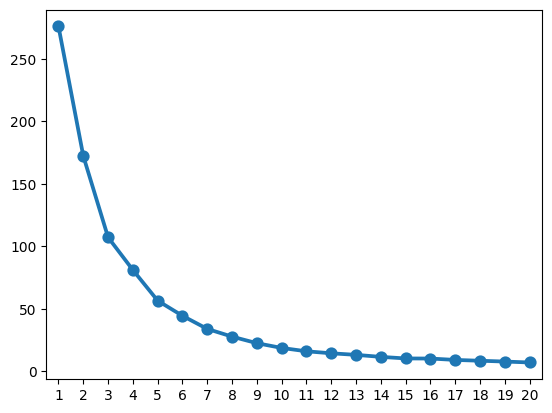

In [30]:
import seaborn as sns
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))